In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=pt---------pt-tso-0001entrylng%20terminals,pt---------pt-tso-0001entrytransmissiones---------,pt---------pt-tso-0001exitlng%20terminals,pt---------pt-tso-0001entrystorage,pt---------pt-tso-0001exittransmissiones---------,pt---------pt-tso-0001exitfinal%20consumers,pt---------pt-tso-0001exitstorage,pt---------pt-tso-0001exitdistribution&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesPTPT---------PT-TSO-0001entryLNG Te...        1   Aggregates   
1    1AggregatesPTPT---------PT-TSO-0001entryStorag...        1   Aggregates   
2    1AggregatesPTPT---------PT-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesPTPT---------PT-TSO-0001exitDistrib...        1   Aggregates   
4    1AggregatesPTPT---------PT-TSO-0001exitFinal C...        1   Aggregates   
..                                                 ...      ...          ...   
212  1AggregatesPTPT---------PT-TSO-0001entryTransm...        1   Aggregates   
213  1AggregatesPTPT---------PT-TSO-0001exitDistrib...        1   Aggregates   
214  1AggregatesPTPT---------PT-TSO-0001exitFinal C...        1   Aggregates   
215  1AggregatesPTPT---------PT-TSO-0001exitStorage...        1   Aggregates   
216  1AggregatesPTPT---------PT-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day      value
0          entry    2  196716797
1          entry    2          0
2          entry    2          0
3           exit    2   77998359
4           exit    2  120682106
..           ...  ...        ...
212        entry    1          0
213         exit    1   73042074
214         exit    1   86209083
215         exit    1   11690943
216         exit    1   40285974

[217 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         6.412630e+07
    exit          5.280702e+07
2   entry         6.557227e+07
    exit          5.229103e+07
3   entry         7.830060e+07
...                        ...
29  exit          4.960339e+07
30  entry         6.207878e+07
    exit          4.973678e+07
31  entry         6.453117e+07
    exit          4.838930e+07

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

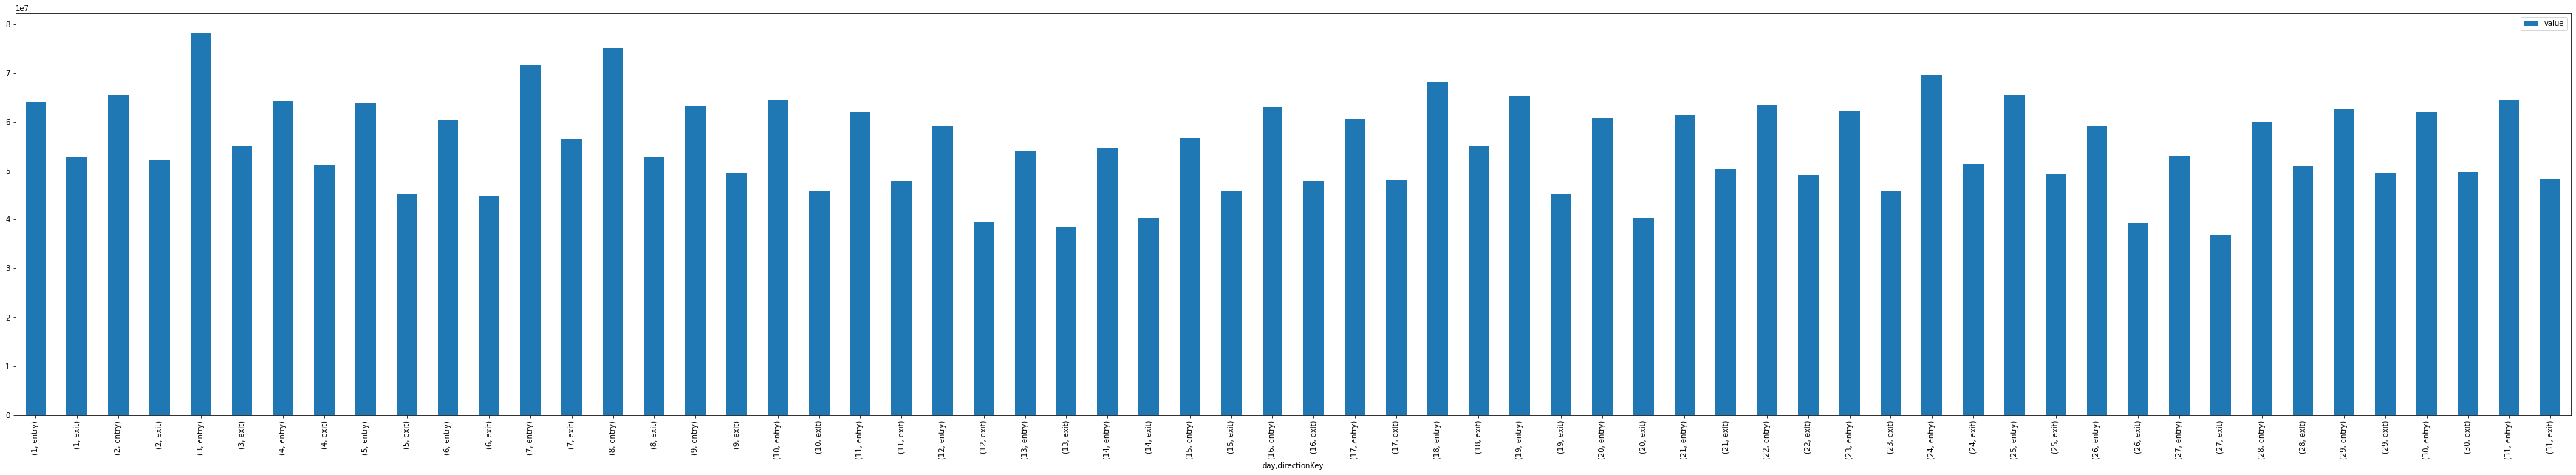

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))